As ever, let's generate a dataset. **Note**, I've changed `THETA0 = 1` and generated a dataset from zero to one, rather than to one hundred.

This is to make the size of the errors nicer, since the squares of large numbers are yet even larger.

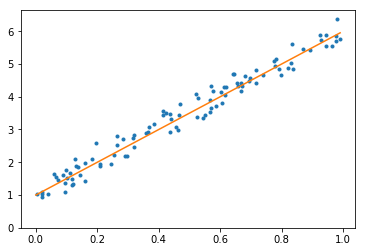

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

THETA0 = 1
THETA1 = 5.0
NOISE_STDDEV = 0.25

x = np.random.uniform(low = 0, high = 1.0, size = 100)
y = THETA0 + THETA1 * x
y += np.random.normal(scale = NOISE_STDDEV, size = 100)

def plot_data_and_line(theta0, theta1):
    plt.figure()
    plt.plot(x, y, '.')
    plt.ylim(ymin = 0)

    x_range = np.arange(0, 1.0, 0.01)
    plt.plot(x_range, theta0 + theta1 * x_range, '-')
    
plot_data_and_line(THETA0, THETA1)

It's time to solve the problem for both $\theta_0$ and $\theta_1$.

To start, let's plot the contour plot of the error surface.

**First**, write a function called `sse_error(theta0, theta1)`. Go ahead and capture the `x` and `y` global variables.

**Second**, write a function called `sse_errors(theta0_range, theta1_range)`. This function should return a *matrix* of errors. To create a matrix, you can write `np.zeros(shape = (num_rows, num_columns))`. Call this matrix `errors`.

The format of `errors` should be as follows. `errors[i, j]` should be the SSE error for `theta0_values[j], theta1_values[i]`. That is: the matrix should have a row for each `theta1_value` and a column for each `theta0_value`.

That feels weird, but that's what the contours function wants.

**Third**, use the `plt.contour` function to plot the error surface. I have picked an appropriate `theta0_range, theta1_range`. To use, give as the first argument `theta0_range` (that's your $x$ values), then `theta1_range` (that's your $y$ values), and third `errors`. Errors are your $z$ values: the height of the error surface. Give as a keyword argument `contours = contour_levels` to use my given contour levels.

Assign the result of `plt.contour` to a variable `cs`. `plt.contour` returns a list of contour objects. I pass these to `plt.clabel` to write numeric labels onto the contour lines.

Write this in a function called `plot_contours()`. It is okay to capture the `theta0_range, theta1_range, errors` variables.

I've used `plt.figure(figsize = (7, 7))` to have a nice large square figure. This will also make a new figure each time we call `plot_contours()`, which will be useful later.

(300, 120)


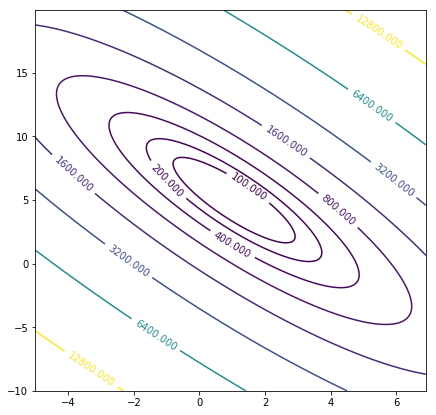

In [2]:
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contour.html

def sse_error(theta0, theta1):
    # you may use x, y, and THETA0 here.
    return np.sum(((theta0 + theta1 * x) - y) ** 2)

def sse_errors(theta0_range, theta1_range):
    errors = np.zeros(
        shape = (
            len(theta1_range),
            len(theta0_range)
        )
    )
    
    for i in range(len(theta1_range)):
        for j in range(len(theta0_range)):
            errors[i, j] = sse_error(theta0_range[j], theta1_range[i])

    return errors

theta0_range = np.arange(-5, 7, 0.1)
theta1_range = np.arange(-10, 20, 0.1)
errors = sse_errors(theta0_range, theta1_range)
print(errors.shape)
# => Should be (300, 120)
contour_levels = [
    100,
    200,
    400, 
    800,
    1600,
    3200,
    6400,
    12800
]

def plot_contours():
    plt.figure(figsize = (7, 7))
    cs = plt.contour(
        theta0_range,
        theta1_range,
        errors,
        levels = contour_levels
    )

    plt.clabel(cs)

plot_contours()

Next, **let's write functions to calculate the first and second derivatives** with respect to $\theta_0$ and $\theta_1$. Having done that, let's write methods to improve $\theta_0, \theta_1$.

A trick to note. Say I need to take the derivative of $\sum 2 * x$ with respect to $x$. This is equal to $\sum 2 * 1$. To calculate this, I might do this trick: `np.sum(2 * np.ones(len(x))`.

This way I will sum an array of ones as long as the array of $x$s.

In [3]:
def error_deriv_wrt_theta0(theta0, theta1):
    return np.sum(2 * ((theta0 + theta1 * x) - y) * 1)

def error_2nd_deriv_wrt_theta0(theta0, theta1):
    return np.sum(2 * np.ones(len(x)))

def error_deriv_wrt_theta1(theta0, theta1):
    return np.sum(2 * ((theta0 + theta1 * x) - y) * x)

def error_2nd_deriv_wrt_theta1(theta0, theta1):
    return np.sum(2 * x * x)

# Return (improved theta0, old theta1)
def improve_theta0(theta0, theta1):
    return (
        theta0 + (
            - error_deriv_wrt_theta0(theta0, theta1)
            / error_2nd_deriv_wrt_theta0(theta0, theta1)
        ),
        theta1
    )
# Return (old theta0, improved theta1)
def improve_theta1(theta0, theta1):
    return (
        theta0,
        theta1 + (
            - error_deriv_wrt_theta1(theta0, theta1)
            / error_2nd_deriv_wrt_theta1(theta0, theta1)
        )
    )

# The should both print out approximately (1, 5), the correct theta values.
# Why do these give the right answer for theta0, theta1?
print(
    improve_theta0(10, 5)
)
print(
    improve_theta1(1, 0)
)

(1.048083586019283, 5)
(1, 5.0698615345910154)


Last, let's make a cool "animation" to see our progress.

I've started `theta0_estimates` and `theta1_estimates` off. I've also given you a loop that will run 10 steps.

Each step, get the most recent theta estimates. Call these `old_theta0, old_theta1`.

Next, for each even step, update `theta0` using `improve_theta0`. For each odd step update `theta1`. Append these new estimates to the lists.

Call `plot_contours()` to draw the contours in a new figure. We want to then draw all the steps made so far. For this, I have written the shell of a function called `plot_arrows()`.

Loop through your estimates, drawing an arrow for each step. To draw an arrow, use `plt.arrow(x, y, delta_x, delta_y)`.

Last, call `plot_data_and_line` with your latest `theta0, theta1` each time, so you can see how your model improves!

Okay, you did it! If you like go ahead and run more steps to get a better answer!

/Users/ruggeri/.anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


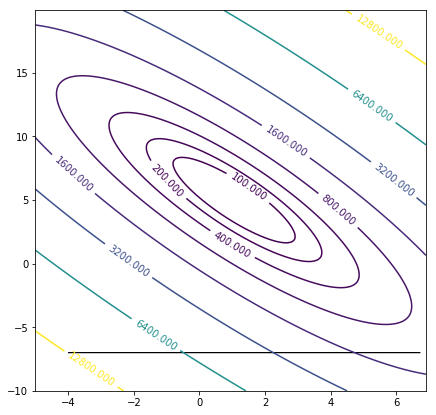

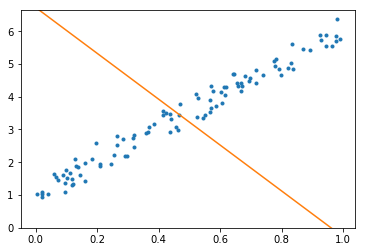

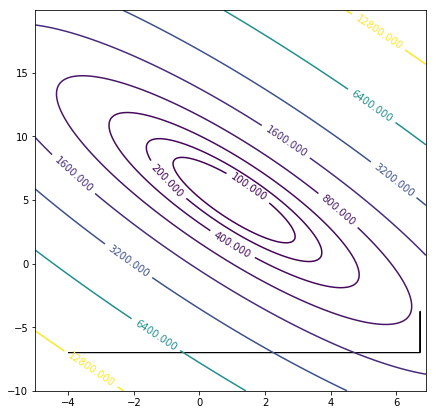

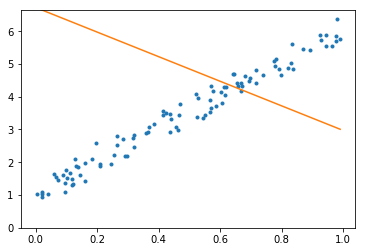

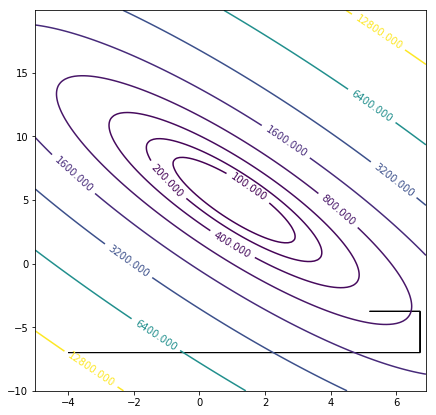

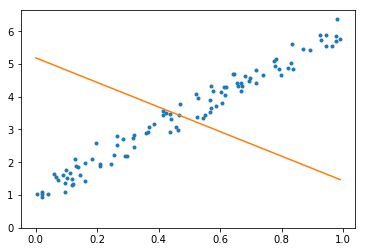

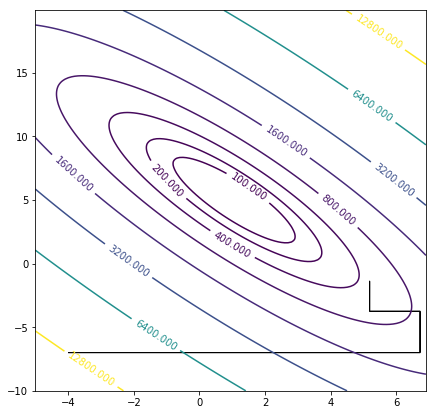

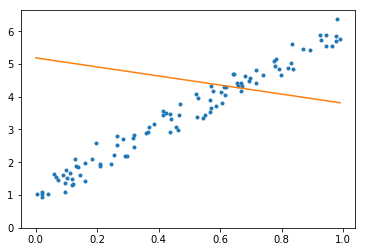

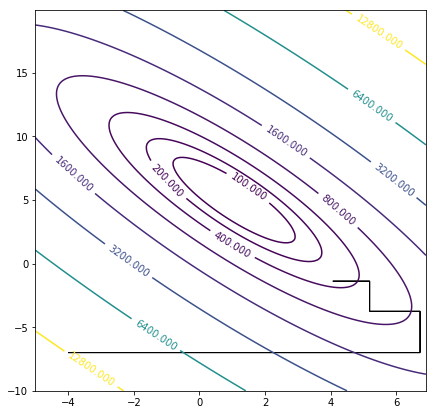

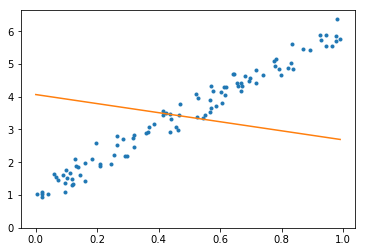

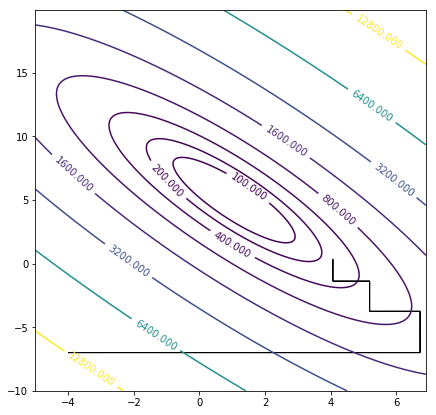

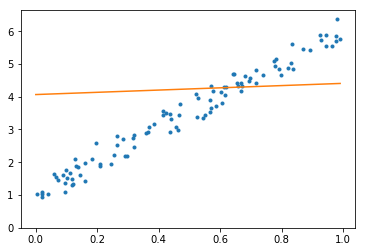

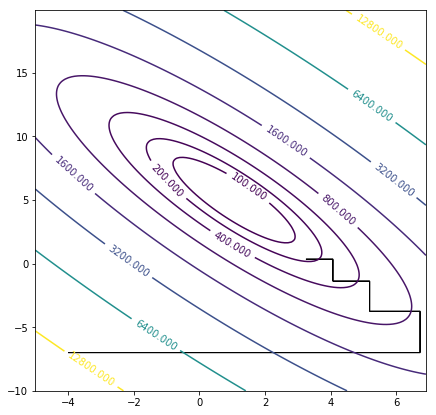

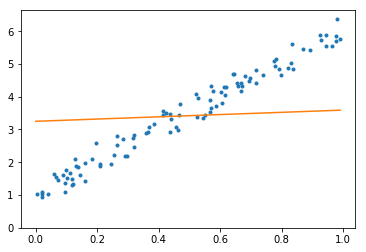

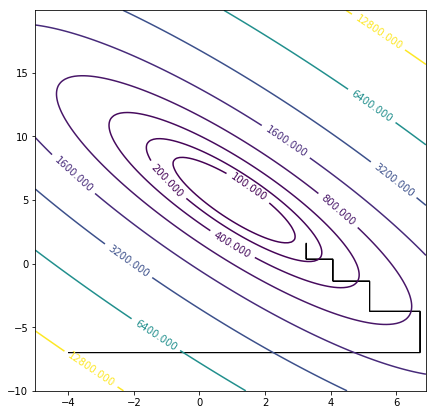

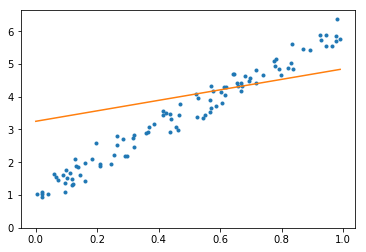

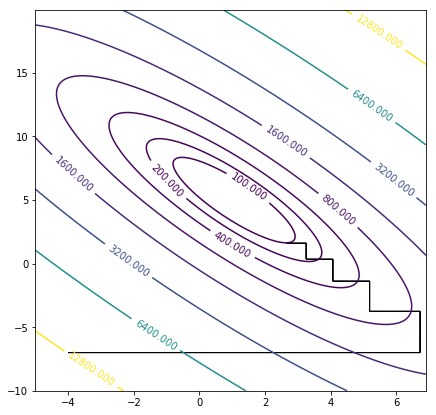

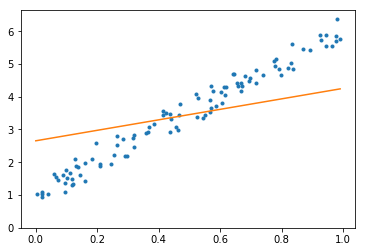

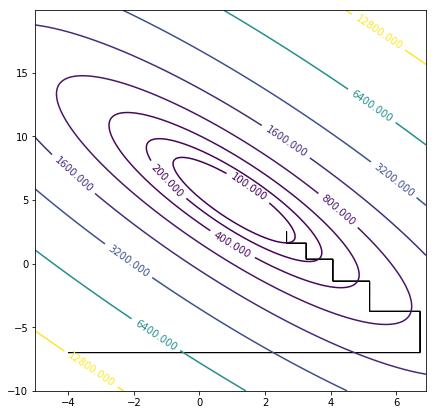

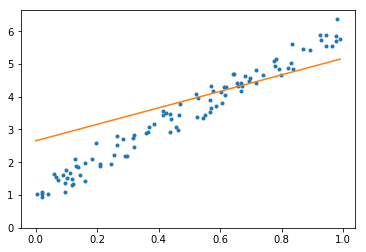

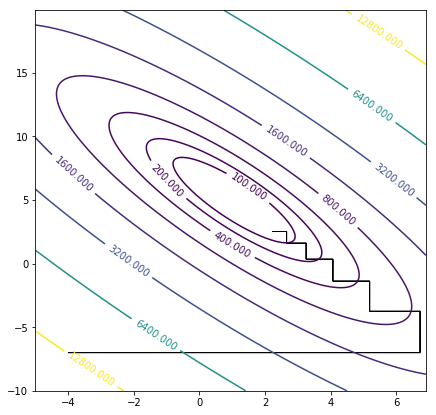

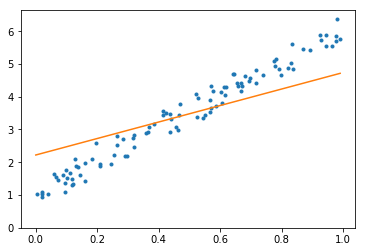

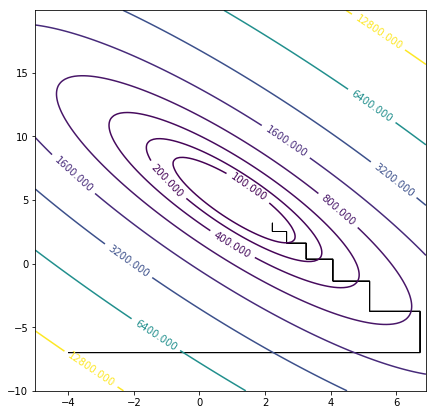

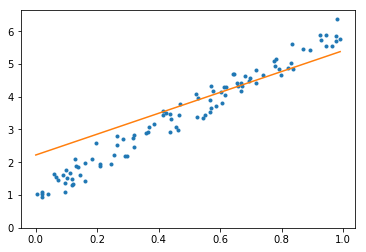

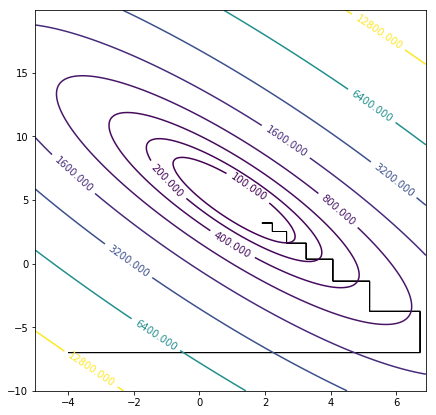

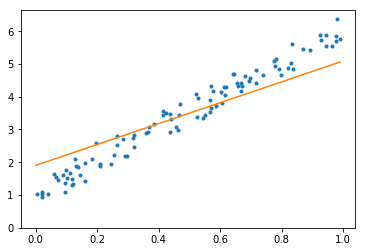

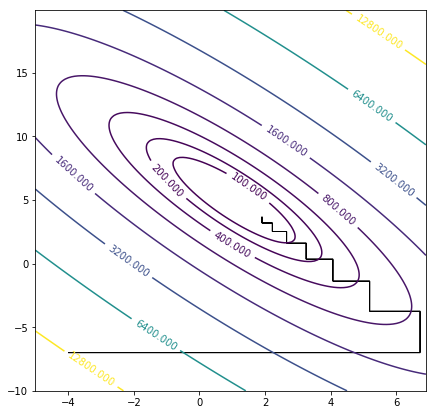

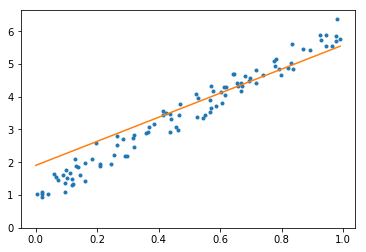

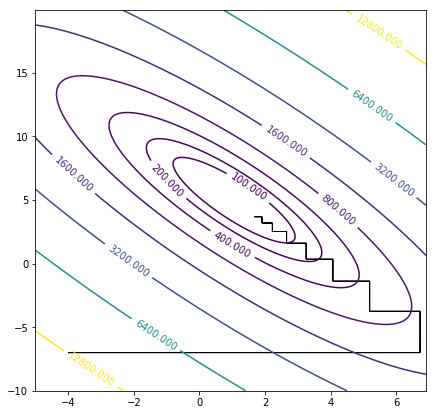

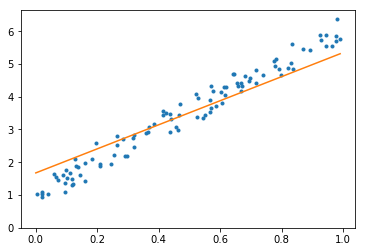

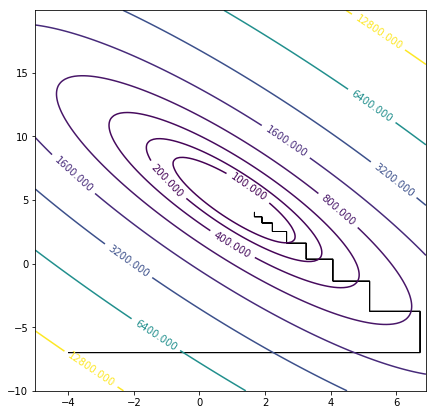

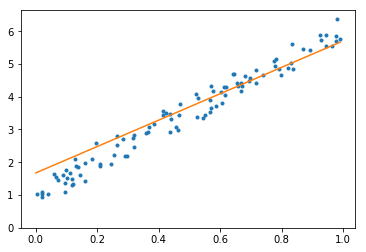

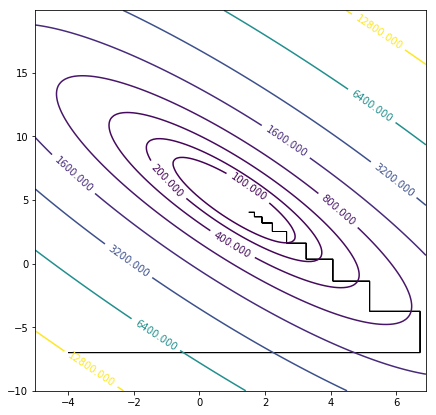

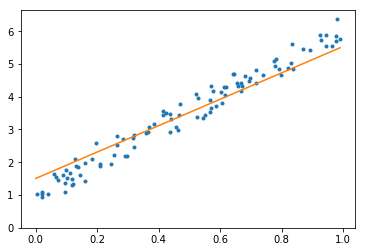

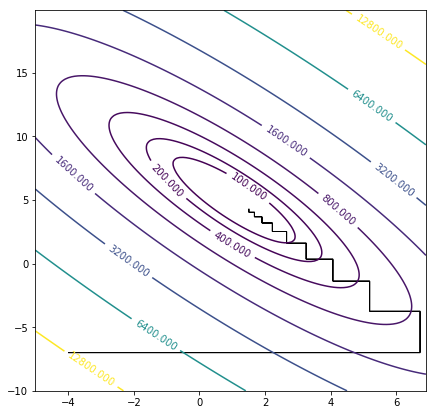

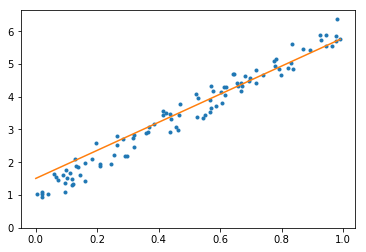

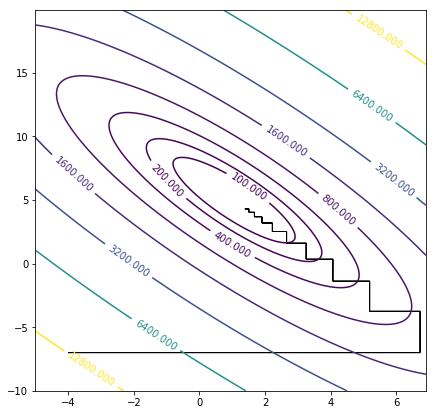

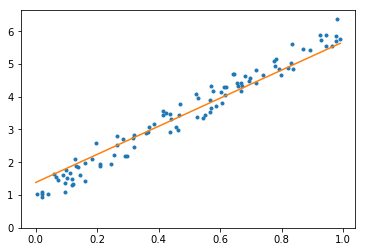

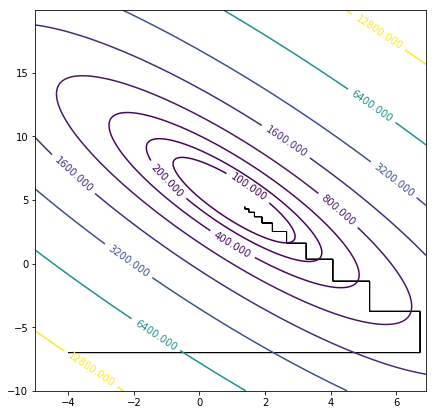

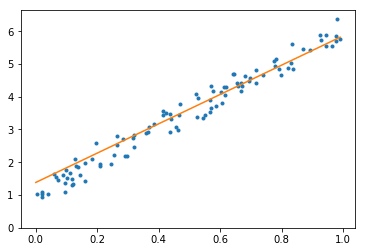

In [4]:
theta0_estimates = [-4]
theta1_estimates = [-7]

def plot_arrows():
    for idx in range(0, len(theta0_estimates) - 1):
        plt.arrow(
            theta0_estimates[idx],
            theta1_estimates[idx],
            theta0_estimates[idx + 1] - theta0_estimates[idx],
            theta1_estimates[idx + 1] - theta1_estimates[idx],
#             head_width = 0.3,
#             length_includes_head = True,
        )

for idx in range(20):
    old_theta0, old_theta1 = theta0_estimates[-1], theta1_estimates[-1]
    if idx % 2 == 0:
        (new_theta0, new_theta1) = improve_theta0(old_theta0, old_theta1)
    else:
        (new_theta0, new_theta1) = improve_theta1(old_theta0, old_theta1)
        
    theta0_estimates.append(new_theta0)
    theta1_estimates.append(new_theta1)
    
    plot_contours()
    plot_arrows()
    plot_data_and_line(new_theta0, new_theta1)
